In [1]:
import numpy as np
import matplotlib.pyplot as plt
from train import get_parser
from ssd.config.defaults import cfg
from ssd.data.build import make_data_loader
from vizer.draw import draw_boxes
np.random.seed(0)

In [2]:
config_path = "/home/wouter/Documents/TDT4265-Project/SSD/configs/resnet50_waymo.yaml"
cfg.merge_from_file(config_path)
cfg.freeze()

In [3]:
data_loader = make_data_loader(cfg, is_train=True)
if isinstance(data_loader, list):
    data_loader = data_loader[0]
dataset = data_loader.dataset
indices = list(range(len(dataset)))
np.random.shuffle(indices)

17936
Dataset loaded. Subset: train, number of images: 14348


Saved the image to visualization.png


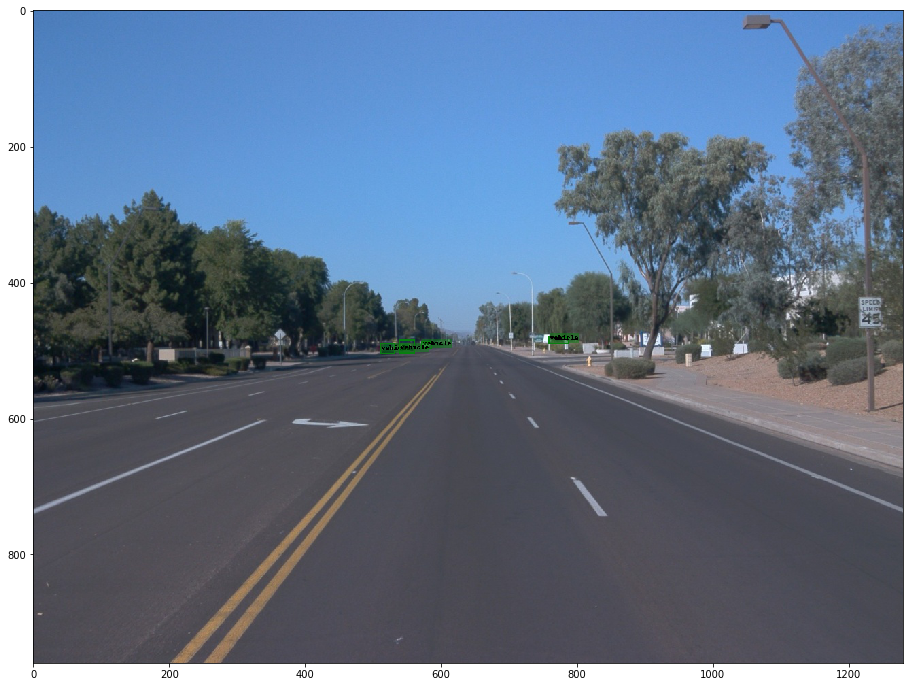

In [4]:
idx = indices[2]
image = dataset._read_image(idx)
boxes, labels = dataset.get_annotation(idx)
image = draw_boxes(
    image, boxes, labels, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.imsave("visualization.png", image)
print("Saved the image to visualization.png")